In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
import astropy.io.fits as fits
from astropy.table import Table 
import matplotlib.colors as clr

In [2]:
df=Table(fits.getdata ('/Users/mgkadrmas/research/LMCParallaxREDO.fits'))

In [3]:
print(df['dec'])

   dec [26]   
--------------
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
           ...
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
Length = 56 rows


In [4]:
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

5

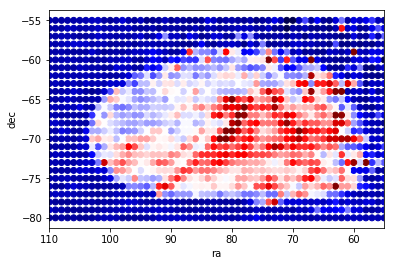

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([110,55])
sc = ax.scatter(df['ra'],df['dec'],c=1/df['parallax'], vmax=75, vmin=0, cmap=plt.cm.seismic)
fig.canvas.mpl_connect('button_press_event', onclick)


In [6]:
def roi_cut(xcut,ycut,x,y):
    """
    xcut : numpy array
         Array of x-values for the cut
    ycut : numpy array
         Array of y-values for the cut
    x : numpy array or list
         Array of input x-values to be cut
    y : numpy array or list
         Array of input y-values to be cut

    Returns
    ind : numpy array
       The indices of values OUTSIDE the cut
    cutind : 
       The indices of values INSIDE the cut

    """

    from matplotlib.path import Path
    tupVerts = list(zip(xcut,ycut))
    points = np.vstack((x,y)).T
    p = Path(tupVerts) # make a polygon
    inside = p.contains_points(points)
    ind, = np.where(~inside)
    cutind, = np.where(inside)

    return ind, cutind
    print (ind, cutind)

In [7]:
##### use np.reshape or np.squeeze 
ran=np.reshape(df['ra'],1456)
decn=np.reshape(df['dec'],1456)


In [8]:
xcut=[102.237903,99.022177,95.584677,90.372984,85.715726,75.625000,71.189516,67.752016,63.981855,62.207661,59.879032,58.770161,57.217742,56.219758,59.213710,63.870968,71.522177,78.840726,87.046371,93.256048,100.020161,103.014113,104.012097]
ycut=[-64.938814,-63.151940,-61.439520,-59.801552,-58.312490,-58.238037,-58.461396,-59.429286,-60.173817,-62.109597,-65.385533,-68.512562,-71.490685,-75.138886,-76.851306,-77.893650,-78.489274,-78.191462,-78.191462,-77.521384,-75.362245,-72.458575,-68.438109]
x=ran
y=decn

(ind, cutind) = roi_cut(xcut,ycut,x,y)
      

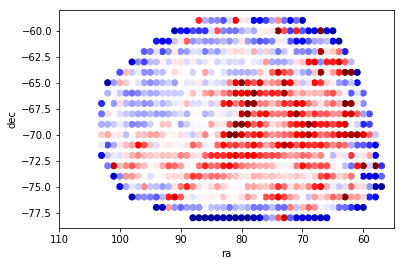

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([110,55])
sc = ax.scatter(df['ra'].ravel()[cutind],df['dec'].ravel()[cutind],c=1/df['parallax'].ravel()[cutind], vmax=75, vmin=0, cmap=plt.cm.seismic)


In [10]:
alldists=1/(df['parallax'])
alldists[25,12]

66.4590097352416

In [11]:
dists=1/(df['parallax'].ravel()[cutind])
distavg=np.mean(dists)
print(distavg)

40.194615767089196


In [12]:
alldists=1/(df['parallax'])

racenter=np.radians(81.9)
deccenter= np.radians(-69.866667)
distcenter=50
theta=np.radians(146.37+90)

def inclin(ra,dec):
    raval=(ra-55)
    decval=(dec+80)
    dist=alldists[raval,decval]
    ra=np.radians(ra)
    dec=np.radians(dec)
    cosro= np.cos(dec)*np.cos(deccenter)*np.cos(ra-racenter) + np.sin(dec)*np.sin(deccenter)
    sinro=np.sin(np.arccos(cosro))
    phi= np.cos(-np.cos(dec)*np.sin(ra-racenter)/sinro)
    
    inclin=np.arctan((cosro-(distcenter/dist))/(sinro*np.sin(phi-theta)))
    return inclin

In [13]:
inclination=np.zeros((56,26))
for i in range(56):
    RA=i+55
    for j in range (26):
        DEC=j-80
        inc=inclin(RA,DEC)
        inclination[i,j]=inc

In [14]:
inclinreal=inclination.ravel()[cutind]
inclinavg=np.degrees(np.mean(inclinreal))
print(inclinavg)

-36.70317000248582


([array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.]),
  array([39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
  array([39.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.]),
  array([43.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

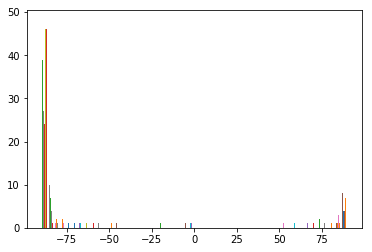

In [15]:
plt.hist((np.degrees(inclination)), bins=50)

In [16]:
racenter=81.9
deccenter= -69.866667
distcenter=50

def dist2LMCtest(ra, dec, pa, io):
    ra1 = np.copy(ra)
    dec1 = np.copy(dec)
    ra1 = np.radians(ra1)
    dec1 = np.radians(dec1)
    alph0 = np.radians(racenter) #np.radians(82.25) #ra of LMC center
    delt0 = np.radians(deccenter) #np.radians(-69.5) #dec of LMC center
    sd = np.sin(delt0)
    cd = np.cos(delt0)
    d0 = 49.9
    io = np.radians(io) #inclination #25.86
    pa = np.radians(pa) #np.radians(149.37+90)  #position angle of line-of-nodes
    cosr = cd*np.cos(dec1)*np.cos(ra1-alph0)+sd*np.sin(dec1)
    sinrcosph = -np.cos(dec1)*np.sin(ra1-alph0)
    sinrsinph = cd*np.sin(dec1)-sd*np.cos(dec1)*np.cos(ra1-alph0)
    dist = d0*np.cos(io)/(np.cos(io)*cosr-np.sin(io)*np.cos(pa)*sinrsinph+np.sin(io)*np.sin(pa)*sinrcosph)
    return dist



In [17]:
def chi2(Dist, Distheory, sigma):
    chii=((Dist - Distheory)**2)/Distheory
    #chii=((Dist-Distheory)**2)/(Sigma**2)
    chi2=np.sum(chii)
    return chi2

In [18]:
dist=1/df['parallax'].ravel()[cutind]
sigma=df['sigma'].ravel()[cutind]

chitype = np.dtype([('theta',float),('inclin',float),('chi2val',float)])
chi2s = np.zeros([170,90], dtype=chitype)
for i in range (170):
    theta=i+191
    for j in range (90):
        inclin=j-17
        dtype=np.dtype([('ra',float),('dec',float),('distheory',float)])
        cat = np.zeros([56,26], dtype=dtype)
        for x in range (56):
            ra=x+55
            for y in range (26):
                dec=y-80
                (distheory) = dist2LMCtest(ra,dec,theta,inclin)
                cat[x,y]['ra']=ra
                cat[x,y]['dec']=dec
                cat[x,y]['distheory']=distheory
        chi2val = chi2(dist, cat['distheory'].ravel()[cutind], sigma)
        chi2s[i,j]['theta']=theta
        chi2s[i,j]['inclin']=inclin
        chi2s[i,j]['chi2val']=chi2val
        
chi2s = Table(chi2s)
chi2s.write('3LMCParallaxChi2.fits', format='fits')

OSError: File exists: 3LMCParallaxChi2.fits

In [ ]:
chi2s['chi2val']

In [23]:
chi2s=fits.getdata('3LMCParallaxChi2.fits')

(array([283., 100.,  60.,  32.,  18.,  15.,  18.,  18.,  14.,  14.,   9.,
          9.,   6.,   5.,   7.,   7.,   5.,   6.,   6.,   6.,   6.,   5.,
          5.,   4.,   4.,   5.,   4.,   4.,   3.,   3.,   4.,   3.,   4.,
          3.,   2.,   1.,   4.,   2.,   1.,   2.,   2.,   1.,   1.,   2.,
          2.,   2.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   2.,   2.,
          1.,   1.,   1.,   1.,   2.,   2.,   1.,   1.,   1.,   1.,   1.,
          2.,   2.,   1.,   1.,   1.,   1.,   0.,   1.,   2.,   1.,   2.,
          2.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   2.,   2.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,   2.,
          1.]),
 array([5253.62094018, 5285.07056833, 5316.52019647, 5347.96982462,
        5379.41945276, 5410.86908091, 5442.31870905, 5473.7683372 ,
        5505.21796534, 5536.66759349, 5568.11722163, 5599.56684978,
        5631.01647792, 5662.46610607, 5693.91573421, 5725.36536236,
        5756.8149905 , 5788.26461865, 5819.714

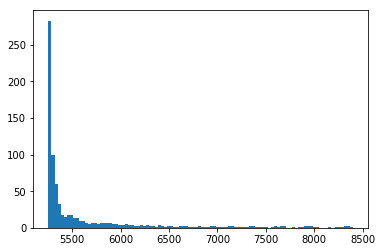

In [24]:
plt.hist(chi2s['chi2val'].ravel()[cutind], bins=100)

In [25]:
np.mean(chi2s['chi2val'].ravel()[cutind])

5612.845591831135

In [26]:
np.median(chi2s['chi2val'].ravel()[cutind])

5318.654271234

In [27]:
np.min(chi2s['chi2val'].ravel()[cutind])

5253.6209401815

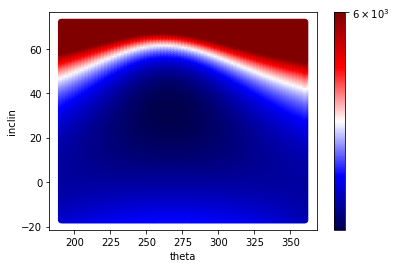

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('theta')
ax.set_ylabel('inclin')
sc = ax.scatter(chi2s['theta'],chi2s['inclin'],c=chi2s['chi2val'], vmax=6000, cmap=plt.cm.seismic, norm=clr.LogNorm())
fig.colorbar(sc)
